In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
#######
import scipy as sp
from pygsp import graphs
from pygsp import filters
#######
from matrixprofile.matrixProfile import stomp
from matrixprofile.motifs import motifs
from matrixprofile.discords import discords

In [2]:
G1 = nx.read_gml('/home/manuelherrera/Data/BT_data/graph_anonymous.gml')

G2 = G1.to_undirected()
for c in nx.connected_components(G2):
    G2.subgraph(c)
    
largest_cc = max(nx.connected_components(G2), key=len)

Gc = G2.subgraph(largest_cc) 
pos = nx.spring_layout(Gc) # layout by default that it is saved for future use

nnodes = len(Gc) # 222 nodes - 206 now
nedges = Gc.number_of_edges() # 730 edges - 722 now

node_names = list(Gc.nodes); link_names = list(Gc.edges)

# initializing substring 
subs = 'core-aln1'
node_names1 = [i for i in node_names if subs in i]

G = Gc.subgraph(node_names1)

pos = nx.spring_layout(G) # layout by default that it is saved for future use

# Fixing node classifications
G.nodes['core-aln1.tan-chachalaca']['nodeType'] = 'regional'
G.nodes['core-aln1.whimsical-angelfish']['nodeType'] = 'metro'

nodes_super = [x for x,y in G.nodes(data=True) if y['nodeType']=='super']
nodes_regional = [x for x,y in G.nodes(data=True) if y['nodeType']=='regional']
nodes_metro = [x for x,y in G.nodes(data=True) if y['nodeType']=='metro']

In [3]:
def color_map(Graph):
    color_map_n = []
    for i in Graph.nodes():
        if Graph.nodes[i]['nodeType'] == 'super':
            color_map_n.append('red')
        elif Graph.nodes[i]['nodeType'] == 'regional':
            color_map_n.append('orange')
        elif Graph.nodes[i]['nodeType'] == 'metro':
            color_map_n.append('green')
        else: color_map_n.append('blue')
    return color_map_n

In [4]:
signal = pd.read_csv('traffic_sum_node.csv', index_col=0) # read matrix of signals

In [5]:
nodes_inner = [x for x,y in G.nodes(data=True) if y['nodeType']=='super' or y['nodeType']=='regional']
nodes_outer = [x for x,y in G.nodes(data=True) if y['nodeType']=='regional' or y['nodeType']=='metro']
df_inner = signal[nodes_inner]
df_outer = signal[nodes_outer]
df_inner

,core-aln1.marigold-curassow,core-aln1.sensible-cuttlefish,core-aln1.stalwart-grouse,core-aln1.slim-centipede,core-aln1a.diamond-gopher,core-aln1.tan-chachalaca,core-aln1.swinging-alpaca,core-aln1.celadon-aardwolf,core-aln1.congenial-python,core-aln1.pistachio-cheetah,core-aln1.diamond-gopher,core-aln1.curvy-gopher,core-aln1.malachite-pheasant
0,7.953527e+10,1.958801e+11,1.613974e+11,2.052399e+11,1.417560e+11,2.240653e+11,1.880169e+11,1.840135e+11,8.786791e+10,1.286666e+11,1.198138e+11,1.798160e+11,2.051683e+11
1,7.940730e+10,1.952953e+11,1.608870e+11,2.088921e+11,1.442204e+11,2.248027e+11,1.869149e+11,1.835262e+11,8.742197e+10,1.279738e+11,1.192250e+11,1.791991e+11,2.052183e+11
2,7.955039e+10,1.955313e+11,1.609764e+11,2.076894e+11,1.454556e+11,2.241222e+11,1.875952e+11,1.820023e+11,8.809557e+10,1.275460e+11,1.212732e+11,1.788993e+11,2.047339e+11
3,7.903129e+10,1.954786e+11,1.624585e+11,2.068661e+11,1.441581e+11,2.254428e+11,1.874082e+11,1.819007e+11,8.792017e+10,1.270550e+11,1.195117e+11,1.799343e+11,2.046087e+11
4,7.896558e+10,1.954149e+11,1.628546e+11,2.081547e+11,1.456535e+11,2.261817e+11,1.875856e+11,1.818726e+11,8.704312e+10,1.281143e+11,1.187909e+11,1.800393e+11,2.041394e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,8.007324e+10,1.904988e+11,1.613509e+11,1.930134e+11,1.532381e+11,2.235011e+11,1.893442e+11,1.821665e+11,8.817561e+10,1.290011e+11,1.195927e+11,1.900088e+11,2.053247e+11
716,7.984398e+10,1.907989e+11,1.618606e+11,1.937081e+11,1.535845e+11,2.225736e+11,1.905284e+11,1.823301e+11,8.830892e+10,1.291187e+11,1.199450e+11,1.914590e+11,2.056424e+11
717,8.002443e+10,1.925228e+11,1.599173e+11,1.948107e+11,1.519106e+11,2.249644e+11,1.895392e+11,1.821221e+11,8.892799e+10,1.286316e+11,1.183684e+11,1.916873e+11,2.065476e+11
718,8.113985e+10,1.924772e+11,1.614680e+11,1.897744e+11,1.536944e+11,2.234763e+11,1.912530e+11,1.820485e+11,8.932546e+10,1.301202e+11,1.187435e+11,1.910859e+11,2.056335e+11


In [7]:
G.nodes(data=True)

NodeDataView({'core-aln1.marigold-curassow': {'site': 'marigold-curassow', 'routerType': 'p', 'nodeType': 'regional'}, 'core-aln1.uptight-mastodon': {'site': 'uptight-mastodon', 'routerType': 'p', 'nodeType': 'metro'}, 'core-aln1.annoying-dogfish': {'site': 'annoying-dogfish', 'routerType': 'p', 'nodeType': 'metro'}, 'core-aln1.dexterous-kestrel': {'site': 'dexterous-kestrel', 'routerType': 'p', 'nodeType': 'metro'}, 'core-aln1.singing-binturong': {'site': 'singing-binturong', 'routerType': 'p', 'nodeType': 'metro'}, 'core-aln1.jovial-quetzal': {'site': 'jovial-quetzal', 'routerType': 'p', 'nodeType': 'metro'}, 'core-aln1.chestnut-koala': {'site': 'chestnut-koala', 'routerType': 'p', 'nodeType': 'metro'}, 'core-aln1.teal-nuthatch': {'site': 'teal-nuthatch', 'routerType': 'p', 'nodeType': 'metro'}, 'core-aln1.versatile-ringtail': {'site': 'versatile-ringtail', 'routerType': 'p', 'nodeType': 'metro'}, 'core-aln1.apricot-capybara': {'site': 'apricot-capybara', 'routerType': 'p', 'nodeType

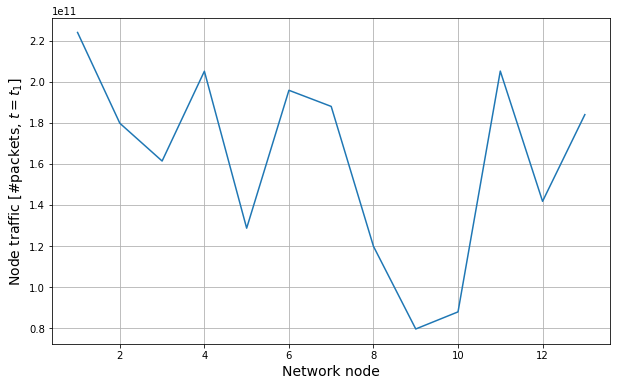

In [227]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Network node',  fontsize=14)
plt.ylabel('Node traffic [#packets, $t = t_1$]',  fontsize=14)
aux = [i for i in range(1, 14)]
ax.plot(aux, df_inner.loc[0]) #, color = 'grey', markersize=10)
fig.savefig("Traffic_t1.pdf", bbox_inches='tight')

In [136]:
Network = G.subgraph(nodes_inner)
#df_inner

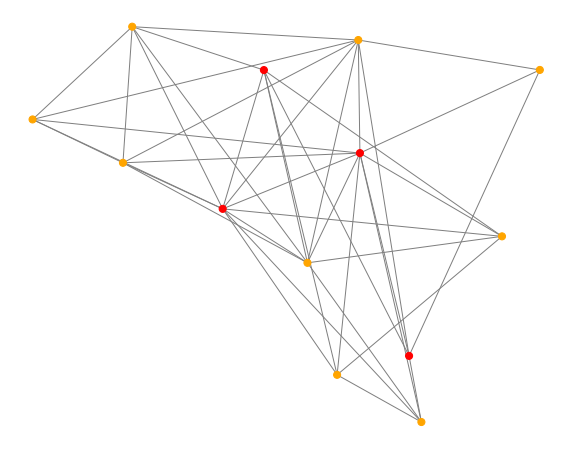

In [137]:
color_map_n = color_map(Network)
f_inner = plt.figure(figsize=(10, 8))
plt.axis('off')
nx.draw_networkx(Network, pos, node_size=50, node_color = color_map_n, edge_color = "gray", with_labels=False)
plt.show()
#f_inner.savefig("BT_inner.pdf", bbox_inches='tight')

In [228]:
# Network weights to represent signal at t0
peso = df_inner.loc[0] # t0 for testing purposes... This should vary from 0 up to T = 719 in this specific case
for i in Network.nodes():
    Network.nodes[i]['weight'] = peso[i]

A = nx.adjacency_matrix(Network, weight='weight')

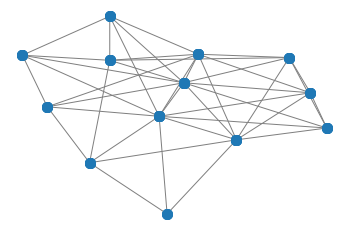

In [229]:
Network1 = graphs.Graph(W = A, gtype = 'Inner core')
Network1.set_coordinates('spring')
Network1.plot()
plt.axis('off'); plt.title('')
eig_val, U = sp.linalg.eigh(Network1.L.toarray()) 

In [230]:
# Plots plt.plot(eig_val[0:13], '+-') ; plt.imshow(G_inner1.W.toarray()) ; plt.spy(G_inner1.W, markersize=2.5)
eig_val, U = sp.sparse.linalg.eigsh(Network1.L, k=10, which='SM')

Text(0.5, 1.0, '')

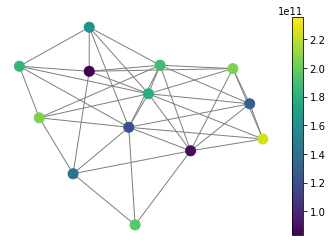

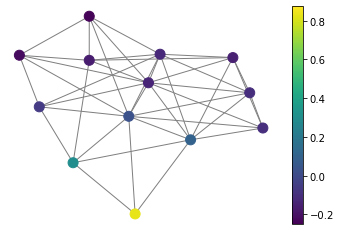

In [231]:
signal = np.array(peso)
Network1.plot_signal(signal)
plt.axis('off'); plt.title('')
Network1.plot_signal(U[:,1]) # #G_inner1.plot_signal(U[:,0]);
plt.axis('off'); plt.title('')

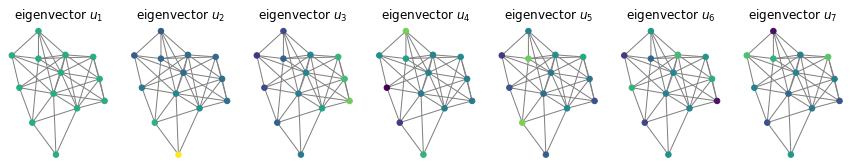

In [232]:
fig, axes = plt.subplots(1, 7, figsize=(15, 2.5))

Network1.compute_fourier_basis()

limits = [f(Network1.U[:, :len(axes)]) for f in (np.min, np.max)]

for i, ax in enumerate(axes):
    Network1.plot_signal(Network1.U[:, i], limits=limits, colorbar=False, vertex_size=30, ax=ax)
    ax.set_title(f'eigenvector $u_{i+1}$')
    ax.set_axis_off()

The largest entry in the Fourier basis is 0.8324770391160697


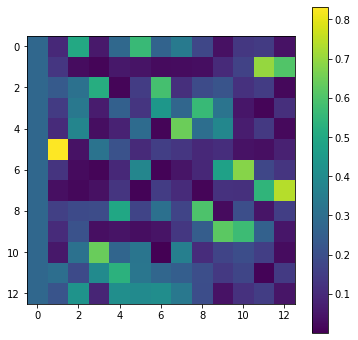

In [234]:
fig = plt.figure(figsize=(6, 6))
plt.imshow(np.abs(Network1.U))
plt.colorbar()
fig.savefig("U_t1.pdf", bbox_inches='tight')
print('The largest entry in the Fourier basis is ' + str(np.max(np.abs(Network1.U))))

Text(0.5, 0, "laplacian's eigenvalues / graph frequencies")

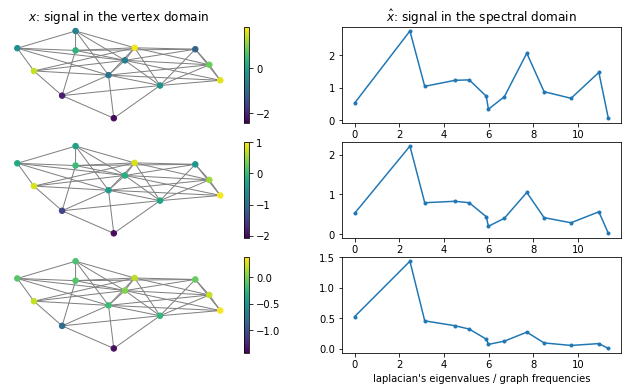

In [243]:
Network1.compute_fourier_basis()

taus = [0, 1, 3]
fig, axes = plt.subplots(len(taus), 2, figsize = (11, 6))

x0 = np.random.RandomState(1).normal(size = Network1.N)
for i, tau in enumerate(taus):
    g = filters.Heat(Network1, tau)
    x = g.filter(x0).squeeze()
    x_hat = Network1.gft(x).squeeze()
    
    Network1.plot_signal(x, vertex_size=30, ax=axes[i, 0])
    axes[i, 0].set_axis_off()
    axes[i, 0].set_title('')
   # axes[i, 0].text(-0.7, -1.2, '$x^T L x = {:.2f}$'.format(x.T @ Network1.L @ x))
    
    axes[i, 1].plot(Network1.e, np.abs(x_hat), '.-')
    
axes[0, 0].set_title(r'$x$: signal in the vertex domain')
axes[0, 1].set_title(r'$\hat{x}$: signal in the spectral domain')
axes[-1, 1].set_xlabel("laplacian's eigenvalues / graph frequencies")

In [236]:
tau = 1
spectra = []
myInt = 10e9
for i in range(len(df_inner)):
    peso = df_inner.loc[i]
    zpeso = [x / myInt for x in peso]
    x0 = np.array(zpeso)
    g = filters.Heat(Network1, tau)
    x = g.filter(x0).squeeze()
    x_hat = Network1.gft(x).squeeze()
    spectra.extend(np.abs(x_hat).tolist())

In [238]:
spectra = list(filter(lambda x: x < 10, spectra))

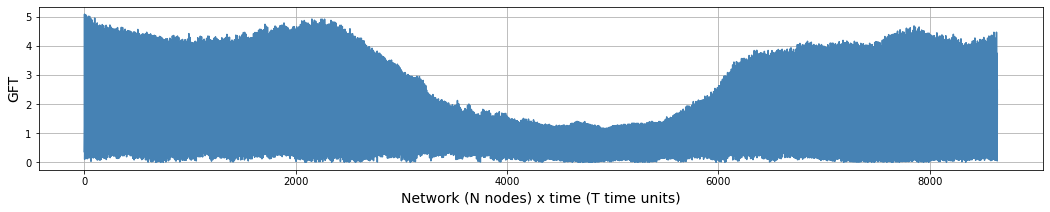

In [205]:
fig, ax = plt.subplots(figsize=(18, 3))
plt.grid(True)
plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
plt.ylabel('GFT',  fontsize=14)
ax.plot(spectra, color = 'steelblue', markersize=10)
fig.savefig("GSP_MP_inner1a.pdf", bbox_inches='tight')

In [206]:
window_size = 12
mp, mpi = stomp(spectra, window_size)

In [207]:
mpi

array([  36.,   37.,   38., ..., 8578., 8579., 8580.])

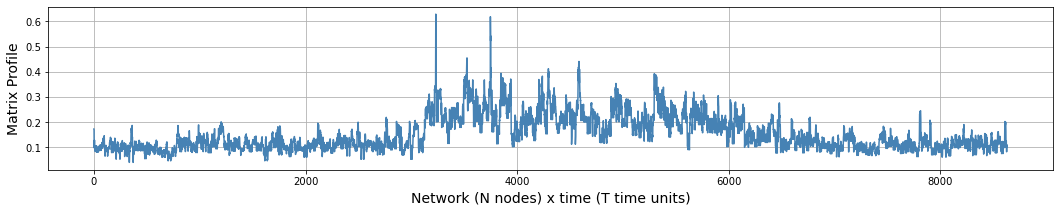

In [208]:
fig, ax = plt.subplots(figsize=(18, 3))
plt.grid(True)
plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
plt.ylabel('Matrix Profile',  fontsize=14)
ax.plot(mp, color = 'steelblue', markersize=4)
fig.savefig("GSP_MP_inner1b.pdf", bbox_inches='tight')

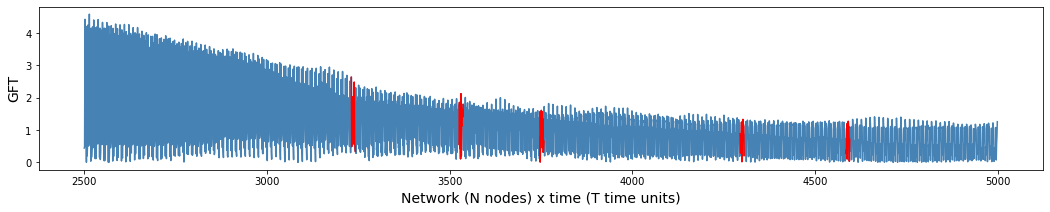

In [213]:
window_size = 12
top_discords = discords(mp, window_size, k=5)
fg, ax = plt.subplots(figsize=(18, 3))
plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
plt.ylabel('GFT',  fontsize=14)
ax.plot([i for i in range(2500, 5000)], spectra[2500:5000], color = 'steelblue', markersize=4)
for start_index in top_discords:
    aux = [i for i in range(start_index, start_index+window_size)]
    ax.plot(aux, spectra[start_index:(start_index+window_size)], color = 'red')
#plt.show()

In [176]:
window_size = 13
top_discords = discords(mp, window_size, k=5)
top_discords # Inner core: array([3231, 3747, 3526, 4584, 4295])

array([3231, 3747, 3526, 4584, 4295])

In [177]:
data = np.array(spectra, dtype=np.float32)
top_motifs = motifs(data, (mp,mpi), max_motifs=5, ex_zone=window_size, n_neighbors=5)
top_motifs # [[335, 371], [678, 702, 726], [1615, 1639]]

([[335, 371], [678, 702, 726], [1615, 1639], [2525, 2549], [2995, 3007]],
 [0.04042227300555967,
  0.04652871129908422,
  0.0467220578981909,
  0.05281779581517878,
  0.05290666052919711])

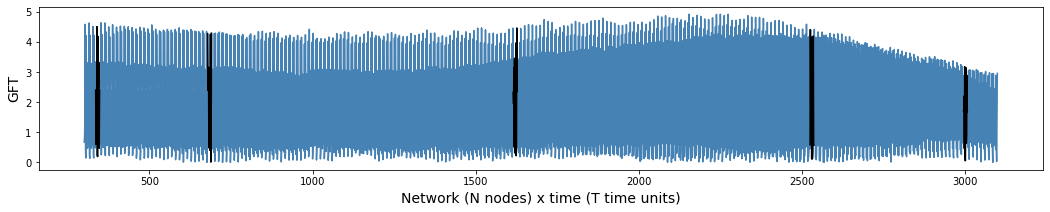

In [178]:
indices = [item[0] for item in top_motifs[0]]
fg, ax = plt.subplots(figsize=(18, 3))
plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
plt.ylabel('GFT',  fontsize=14)
ax.plot([i for i in range(300, 3100)], spectra[300:3100], color = 'steelblue', markersize=4)
for start_index in indices:
    aux = [i for i in range(start_index, start_index+window_size)]
    ax.plot(aux, spectra[start_index:(start_index+window_size)], color = 'black')
#plt.show()

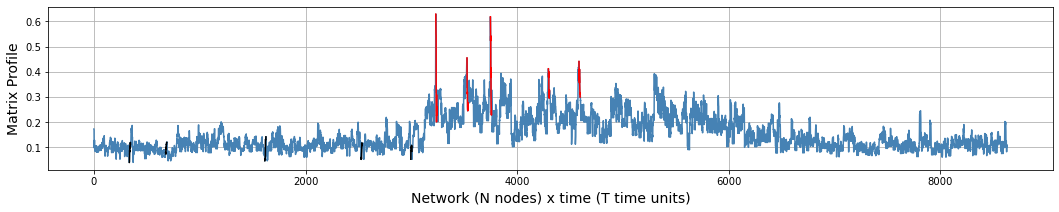

In [210]:
fig, ax = plt.subplots(figsize=(18, 3))
plt.grid(True)
plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
plt.ylabel('Matrix Profile',  fontsize=14)
ax.plot(mp, color = 'steelblue', markersize=4)
for start_index in indices:
    aux = [i for i in range(start_index, start_index+window_size)]
    ax.plot(aux, mp[start_index:(start_index+window_size)], color = 'black')
for start_index in top_discords:
    aux = [i for i in range(start_index, start_index+window_size)]
    ax.plot(aux, mp[start_index:(start_index+window_size)], color = 'red')
fig.savefig("GSP_MP_inner1br.pdf", bbox_inches='tight')

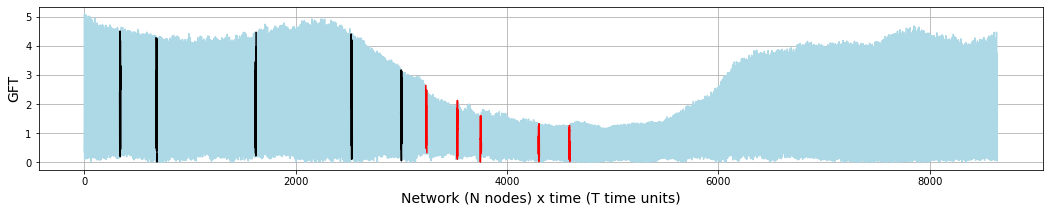

In [212]:
fig, ax = plt.subplots(figsize=(18, 3))
plt.grid(True)
plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
plt.ylabel('GFT',  fontsize=14)
ax.plot(spectra, color = 'lightblue', markersize=10)
for start_index in indices:
    aux = [i for i in range(start_index, start_index+window_size)]
    ax.plot(aux, spectra[start_index:(start_index+window_size)], color = 'black')
for start_index in top_discords:
    aux = [i for i in range(start_index, start_index+window_size)]
    ax.plot(aux, spectra[start_index:(start_index+window_size)], color = 'red')
fig.savefig("GSP_MP_inner1ar.pdf", bbox_inches='tight')

In [181]:
[item[0] for item in top_motifs[0]]

[335, 678, 1615, 2525, 2995]

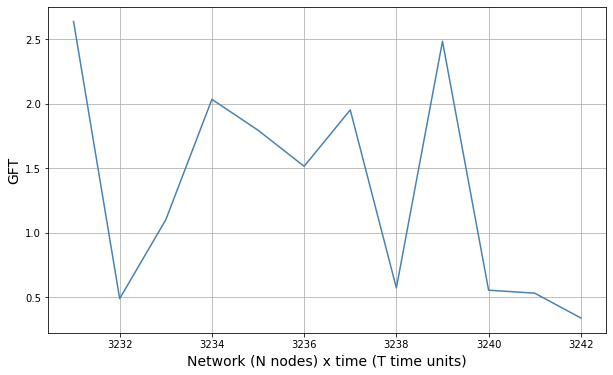

In [182]:
indices = [item[0] for item in top_motifs[0]]
fg, ax = plt.subplots(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
plt.ylabel('GFT',  fontsize=14)
ax.plot([i for i in range(3231, 3243)], spectra[3231:3243], color = 'steelblue', markersize=4)

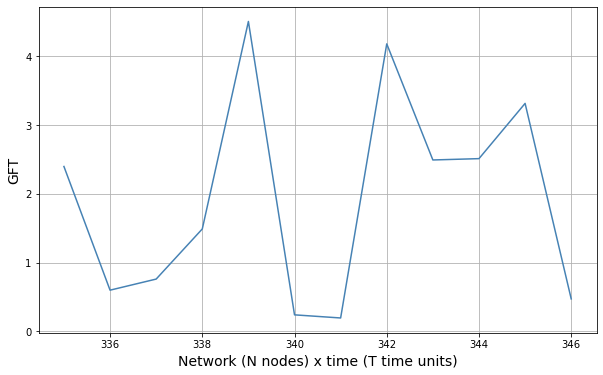

In [183]:
indices = [item[0] for item in top_motifs[0]]
fg, ax = plt.subplots(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
plt.ylabel('GFT',  fontsize=14)
ax.plot([i for i in range(335, 347)], spectra[335:347], color = 'steelblue', markersize=4)

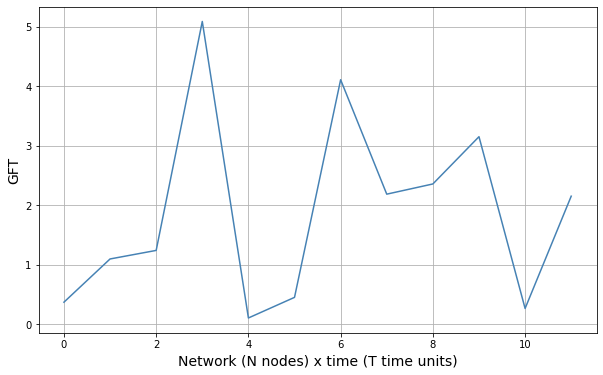

In [240]:
fg, ax = plt.subplots(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
plt.ylabel('GFT',  fontsize=14)
ax.plot([i for i in range(0, 12)], spectra[0:12], color = 'steelblue', markersize=4)

Text(0.5, 0, "laplacian's eigenvalues / graph frequencies")

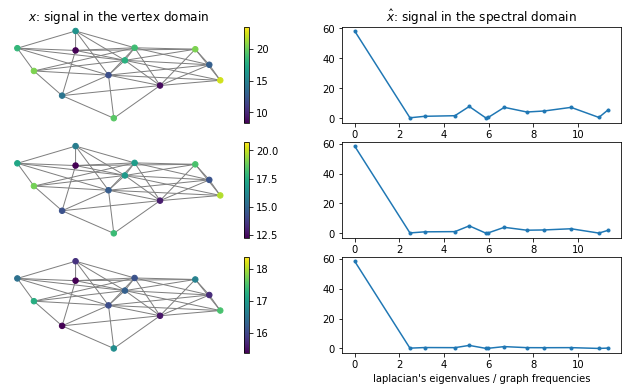

In [253]:
Network1.compute_fourier_basis()

myInt = 10e9
signal = df_inner.loc[0]
signal1 = [x / myInt for x in signal]

taus = [0, 1, 3]
fig, axes = plt.subplots(len(taus), 2, figsize = (11, 6))

x0 =  np.array(signal1)  # [x / myInt for x in signal]  # np.random.RandomState(1).normal(size = Network1.N)
for i, tau in enumerate(taus):
    g = filters.Heat(Network1, tau)
    x = g.filter(x0).squeeze()
    x_hat = Network1.gft(x).squeeze()
    
    Network1.plot_signal(x, vertex_size=30, ax=axes[i, 0])
    axes[i, 0].set_axis_off()
    axes[i, 0].set_title('')
   # axes[i, 0].text(-0.7, -1.2, '$x^T L x = {:.2f}$'.format(x.T @ Network1.L @ x))
    
    axes[i, 1].plot(Network1.e, np.abs(x_hat), '.-')
    
axes[0, 0].set_title(r'$x$: signal in the vertex domain')
axes[0, 1].set_title(r'$\hat{x}$: signal in the spectral domain')
axes[-1, 1].set_xlabel("laplacian's eigenvalues / graph frequencies")

In [254]:
x_hat

array([ 5.82778319e+01,  2.39736600e-01,  6.31620950e-01, -5.63085286e-01,
       -2.06240510e+00, -3.72888988e-02,  1.57370825e-01, -1.26338527e+00,
        5.62843634e-01, -5.29564613e-01,  5.72368422e-01,  3.86446344e-02,
       -2.91353595e-01])

Text(0.5, 1.0, '')

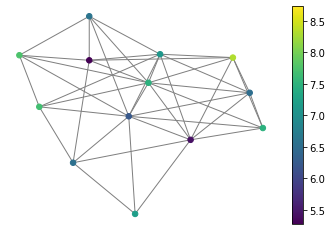

In [265]:
signal = df_inner.loc[335]
signal1 = [x / myInt for x in signal]
signal1
tau = 1
x0 =  np.array(signal1)
g = filters.Heat(Network1, tau)
x = g.filter(x0).squeeze()
x_hat = Network1.gft(x).squeeze()
Network1.plot_signal(x, vertex_size=30)
plt.axis('off'); plt.title('')

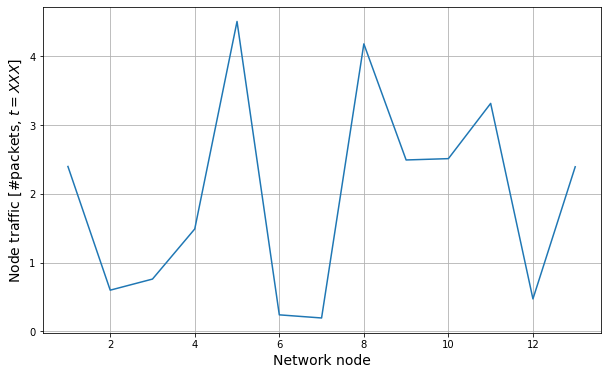

In [273]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Network node',  fontsize=14)
plt.ylabel('Node traffic [#packets, $t = XXX$]',  fontsize=14)
aux = [i for i in range(1, 14)]
ax.plot(aux, spectra[335:348]) #, color = 'grey', markersize=10)
#fig.savefig("Traffic_t1.pdf", bbox_inches='tight')